In [1]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=5000, noise=0.3)

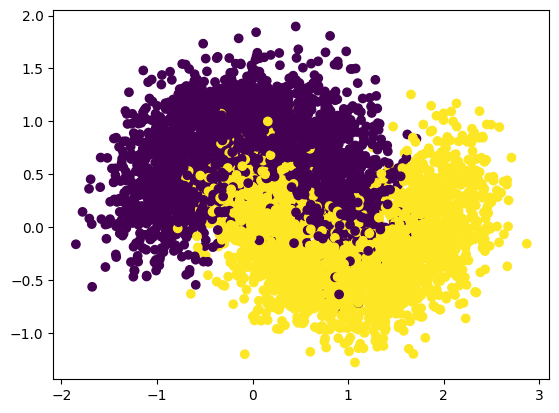

In [2]:
import matplotlib.pyplot as plt
X, y = moons[0], moons[1]
plt.scatter(X[:,0], X[:,1],c=y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_clf = SVC(kernel='rbf', probability=True)
svm_clf.fit(X_train, y_train)

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
print(svm_clf.score(X_test, y_test))
print(rnd_clf.score(X_test, y_test))
print(knn_clf.score(X_test, y_test))

0.912
0.895
0.903


In [6]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier([
    ("svm_clf", svm_clf),
    ("rnd_clf", rnd_clf),
    ("knn_clf",knn_clf),
], voting="hard")

In [7]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm_clf', SVC(probability=True)),
                             ('rnd_clf', RandomForestClassifier(n_jobs=-1)),
                             ('knn_clf', KNeighborsClassifier())])

In [8]:
voting_clf.score(X_test, y_test)

0.912